# Airbnb- NYC Data Analysis

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# Loading the dataset
airbnb=pd.read_csv(r"C:\Users\Abvikas\Desktop\Case study Airbnb\AB_NYC_2019.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
# checking shapes, Dimension
airbnb.shape

(48895, 16)

Rows - 48895
Columns - 16

In [5]:
# columns
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
# Datatypes of columns
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can categorize types of variables as follows from above:
#### Numerical variables :
 - price
 - minimum_nights
 - number_of_reviews
 - reviews_per_month
 - calculated_host_listings_count
 - availability_365
 #### Location Variables :
 - latitude 
 - longitude
 #### Time Variable :
 - last_review
 #### Categorical Variable :
 - id  
 - name 
 - host_id
 - host_name
 - neighbourhood_group              
 - neighbourhood   
 - room_type

In [7]:
# finding unique values
airbnb.id.nunique()

48895

In [8]:
# unique host_id
airbnb.host_id.nunique()

37457

In [9]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


##### Observation
- It seems some entries with 0 price listing also some properties are costliest as max value is far apart from other quantiles 
- No. of reviews also started from 0 to max 629
- Host listing count is maximum 327
- Properties available are from 0 days to max 365 

37457 hosts are listed here.

We can see there is no duplication in listing data.

In [10]:
# finding null values:
airbnb.isnull().sum()/len(airbnb)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

imputing missing values

last_review we will keep as it is 

In [11]:
# airbnb.reviews_per_month will impute with 0 as it has no reviews on for them 
airbnb.fillna(0,inplace=True)


In [12]:
airbnb.reviews_per_month.isnull().sum() # succesfully imputed null values.

0

In [13]:
# name and host name column missing values is less we will impute that by 'unknown' as they are unknown

airbnb.name.fillna('unknown',inplace=True)
airbnb.host_name.fillna('unknown',inplace=True)
print(airbnb.name.isnull().sum())
print(airbnb.host_name.isnull().sum())

0
0


##### Assumptions for filling null values :
- Here reviews per month we filled as 0 as we assume no one has given review on that day hence we kept last review column as it is
- We assume name and host names are unknown as null values hence filled with ‘unknown’


#### Numerical colums 

In [14]:
num_col=airbnb.select_dtypes(include=['int64','float64']).columns
num_col=list(num_col)
print(num_col)

['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


We know 'id' , 'host id', 'longitude', 'lattitude' are categorical and loacation columns hence lets drop them from list

In [15]:
num_col.remove('id')
num_col.remove('host_id')
num_col.remove('latitude')
num_col.remove('longitude')
num_col

['price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

### Univariate analysis

#### Numerical variables

#####  Box plots 

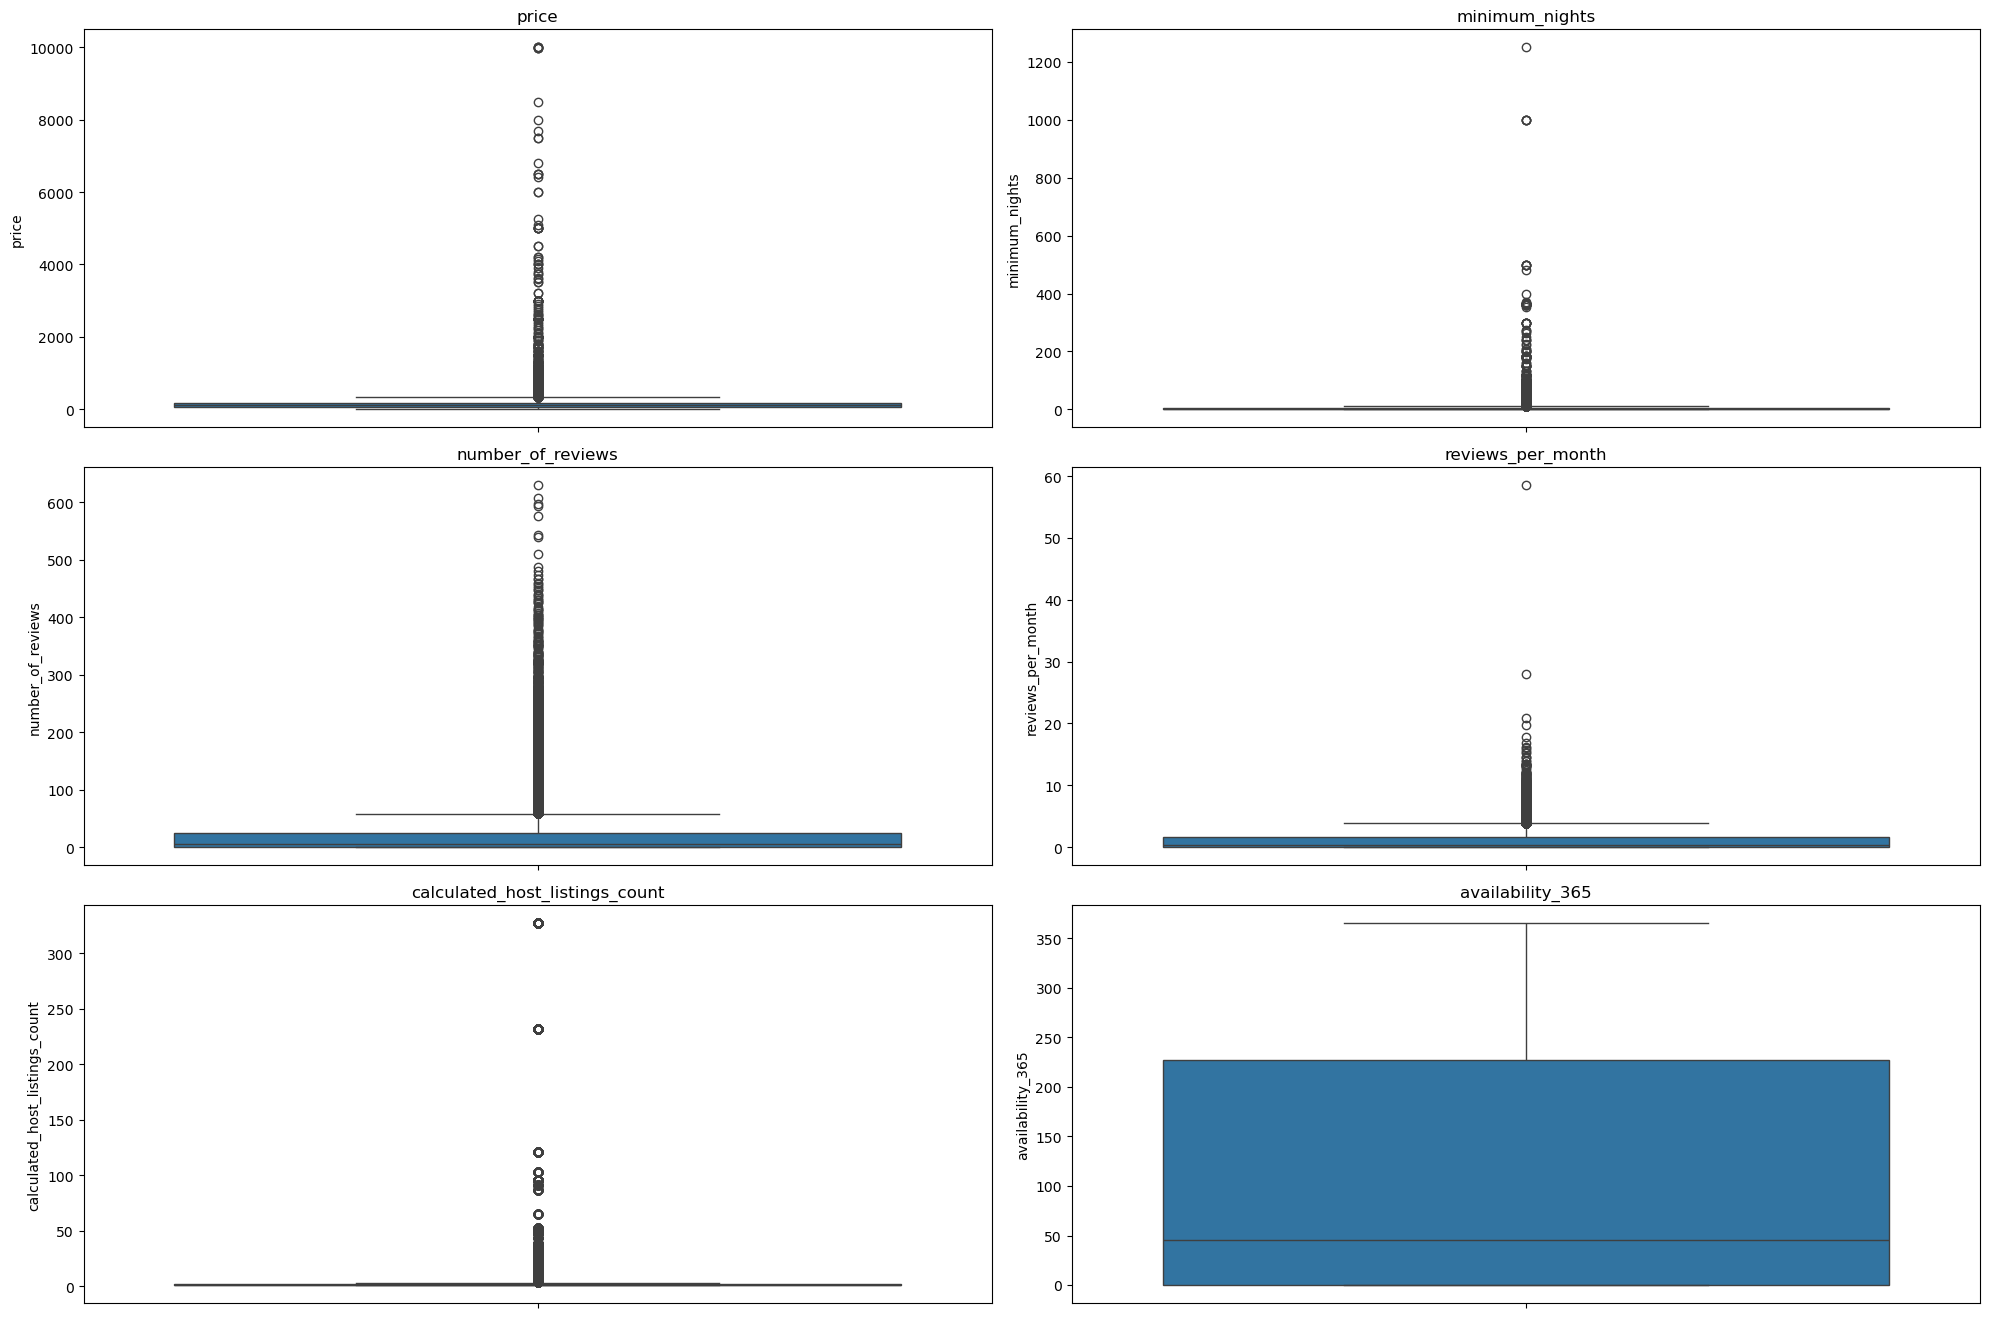

In [17]:
# Plotting box plot
plt.figure(figsize=(20,22))

for n,col in enumerate(num_col):

    plt.subplot(5,2,n+1)    
    sns.boxplot(airbnb[col])
    plt.title(col)
    plt.tight_layout()

Observations:
Looks like there are lots of outliers present in 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count'these variables.

##### histogram

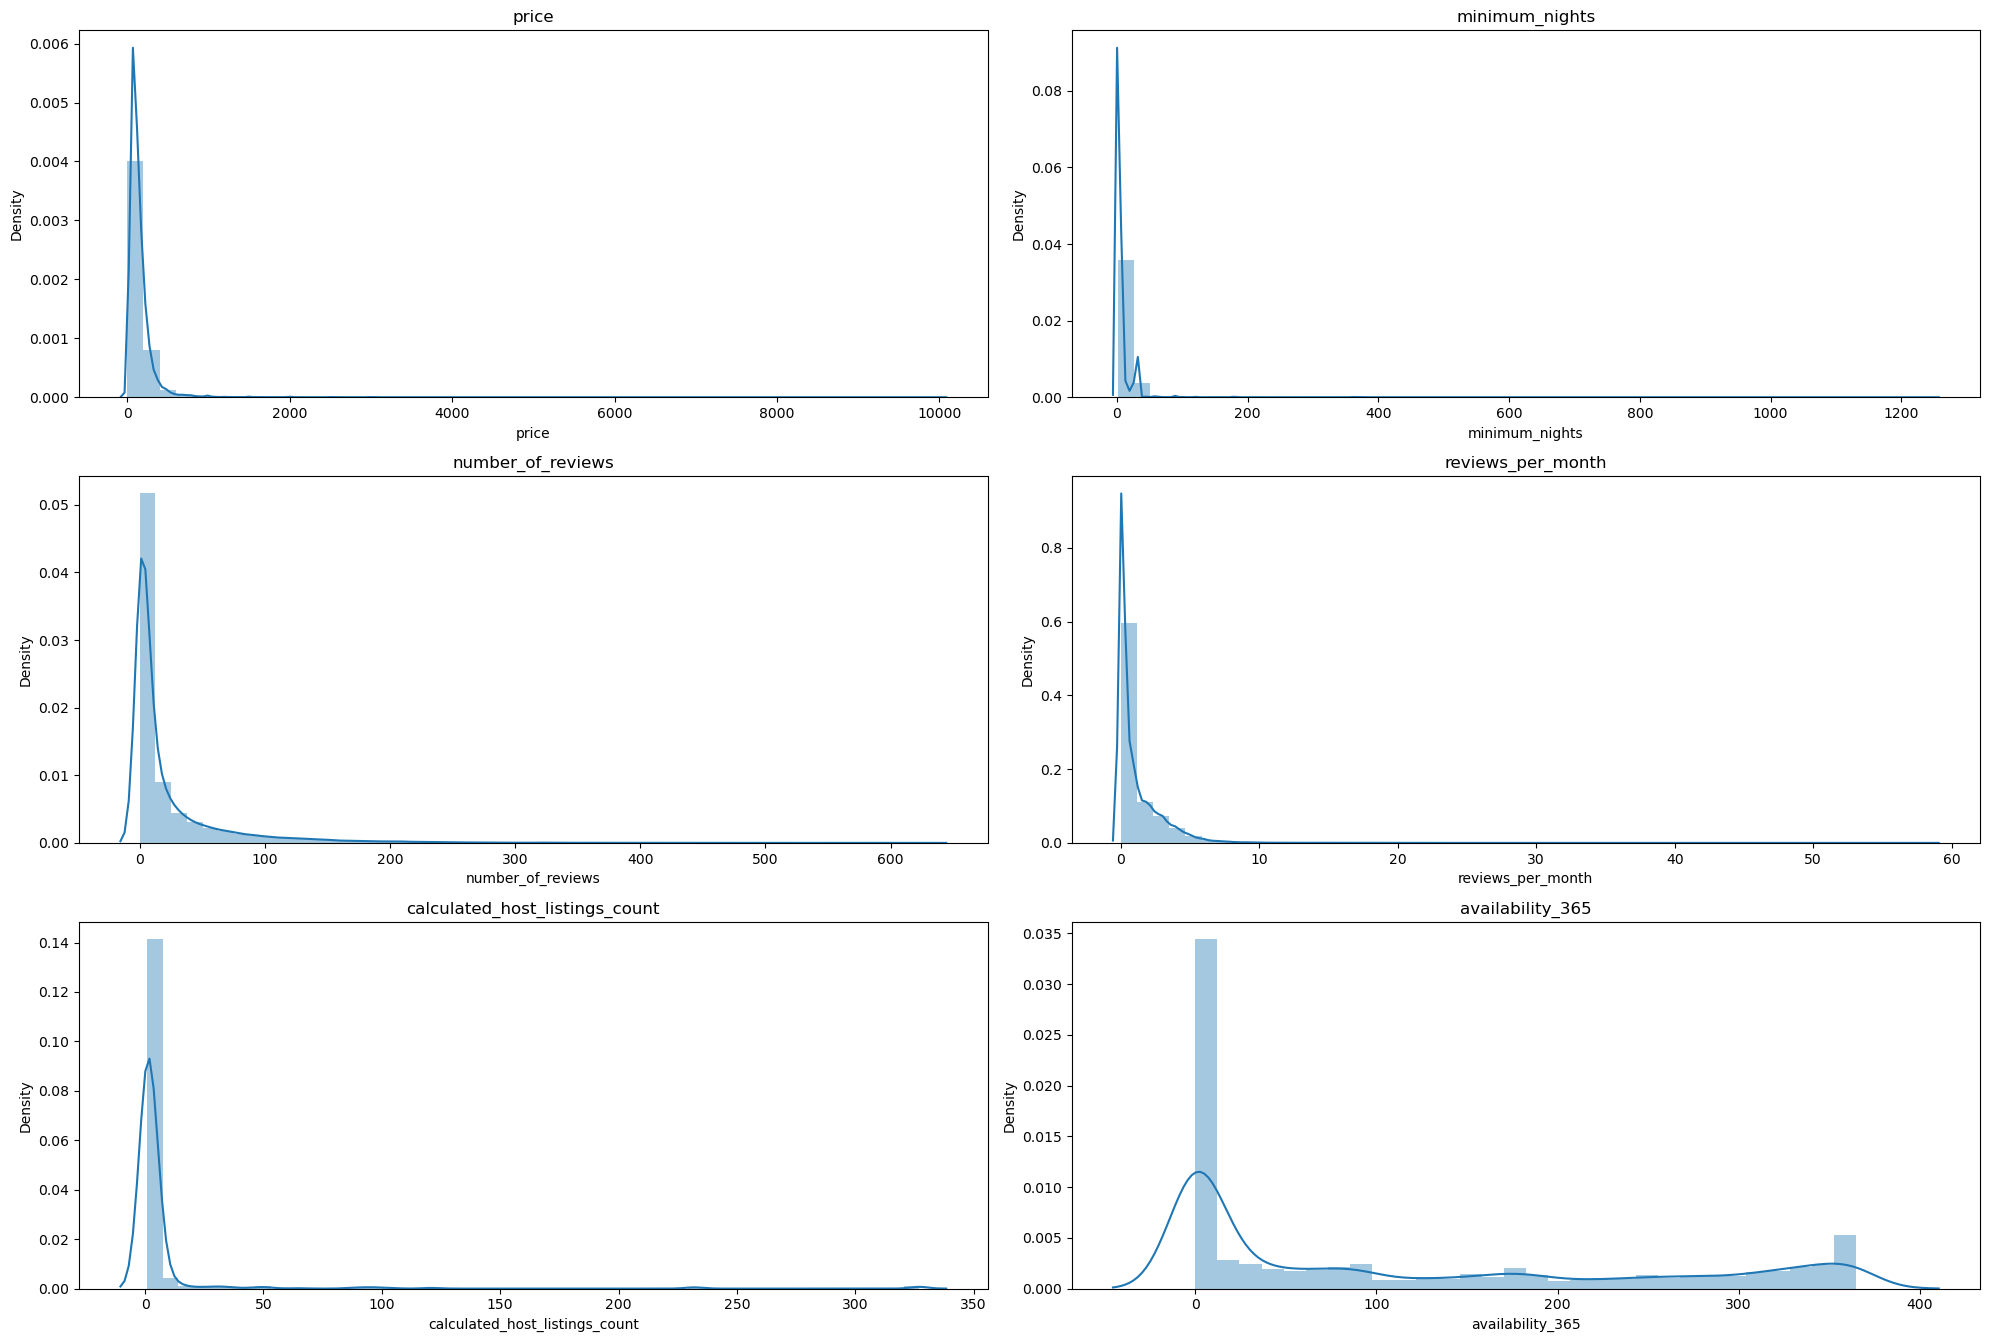

In [18]:
# Plotting histograms for checking distribution over
plt.figure(figsize=(20,22))

for n,col in enumerate(num_col):

    plt.subplot(5,2,n+1)    
    sns.distplot(airbnb[col])
    plt.title(col)
    plt.tight_layout()

Observations:
- Price -has normal distribution with right sided skew and spread over 0 to 1000 
- Minimum Nights- has right skewed normal distribution over 0 to around 50
- Number of reviews -has right skewed normal distribution ranging from 0 to 200 with some spikes above
- reviews per month - has also right skewed distribution with spread of 0 to 10
- calculated_host_listings_count - has right skewed distrution from 0 to 100 and some spikes above
- Availability 365 - has normal distribution with long spread over right side upto 360

#### Categorical variables

##### Counplots

In [19]:
cat_var=airbnb.select_dtypes(include='object')
cat_var=list(cat_var)
cat_var

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

Here name, host names are distinct entries also last_revievs contains date so we will drop them.

In [20]:
cat_var=['neighbourhood_group', 'room_type']
cat_var

['neighbourhood_group', 'room_type']

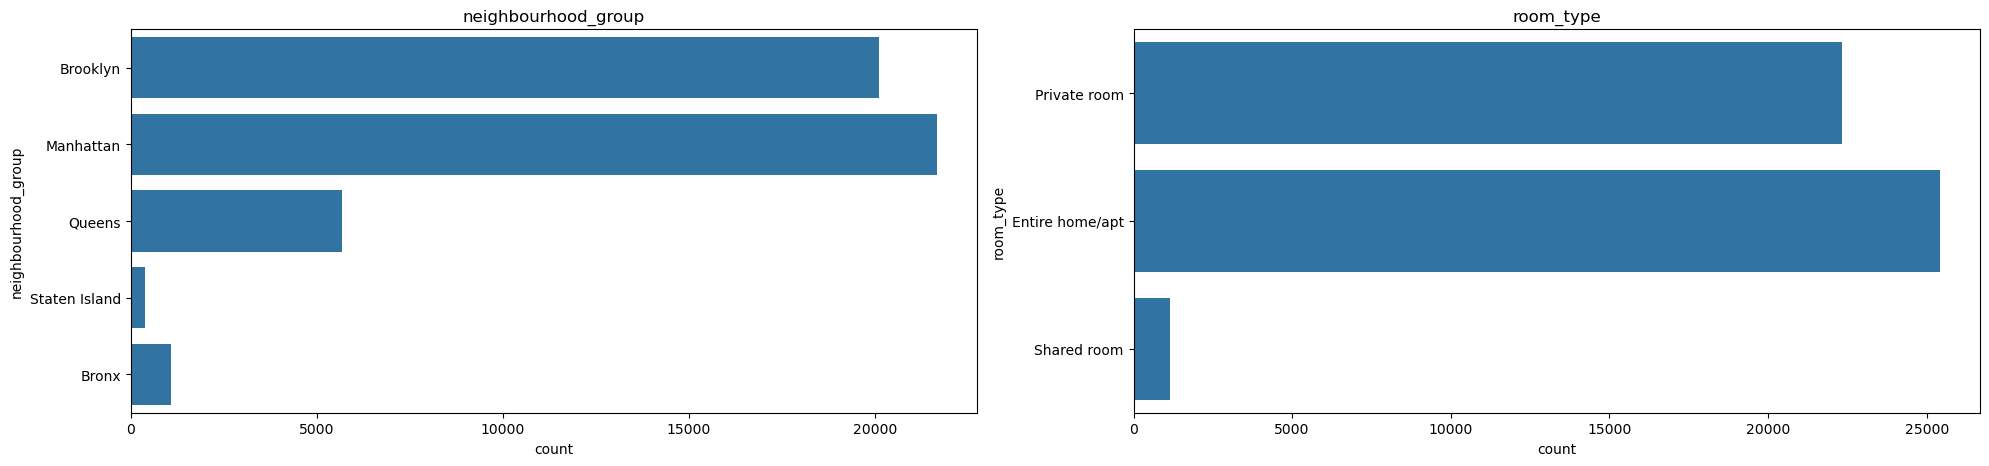

In [21]:
# Plotting histograms for checking distribution over
plt.figure(figsize=(20,22))

for n,col in enumerate(cat_var):

    plt.subplot(5,2,n+1)    
    sns.countplot(airbnb[col])
    plt.title(col)
    plt.tight_layout()

<Axes: ylabel='neighbourhood'>

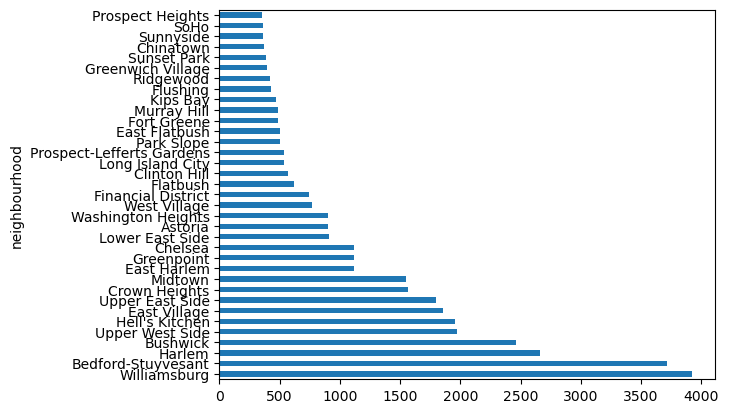

In [23]:
airbnb.neighbourhood.value_counts()[:35].plot.barh() # first 35 by count

In [24]:
airbnb.neighbourhood_group.value_counts() # value counts

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [ ]:
airbnb.room_type.value_counts() # value counts

In [27]:
airbnb.to_csv('airbnb_dataset_cleaned.csv',index=False,header=True)

Creating Bining for availability_365 variable

In [ ]:
def bin_for_availability(values):
    for i in values:
        if airbnb.availability_365==0

In [ ]:
airbnb.availability_365_bins=airbnb.availability_365

In [29]:
airbnb.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64